# Network Notes

In [9]:
# good 160 unit *3 network
network_model = "c2-3200-v4-1-1"
iter1 = 180
iter2 = 1200
codec = 3200
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
if os.path.isfile(nh):
  res = check_output(["tail", "-n 12", nh])
  res = str(res).replace('\\n', "\n")
  print(res)

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



b'Training Iteration 179 
Training Iteration 180 
Generating samples 
saving generated sample output to:  out/c2-3200-v4-1-1/out-c2cb-180 
generating sample data of length:  200 
seed sequence for generation starts at frame index:  0  (approx.  0 : 0 ) 
wrote frames:  200 
Training Iteration 181 
Training Iteration 182 
Training Iteration 183 
Training Iteration 184 
Training Iteration 185 
'
33400/58375 [================>.............] - ETA: 321s - loss: 1.2902'


In [10]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

no markdown file found


In [11]:
nd.model_config(network_model)

lstm_1 : LSTM
trainable?  True
320 units
tanh activation
0.0 dropout

lstm_2 : LSTM
trainable?  False
320 units
tanh activation
0.0 dropout

lstm_3 : LSTM
trainable?  False
320 units
tanh activation
0.0 dropout

dense_1 : Dense
trainable?  True
13 units
elu activation
 dropout



Early Iterations
===

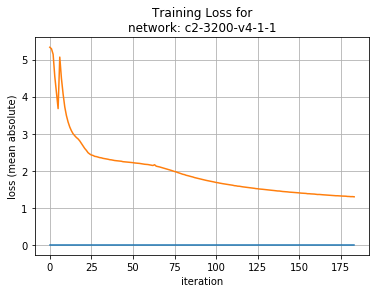

In [12]:
nd.plot_training_loss(network_model)

3200 rate codec



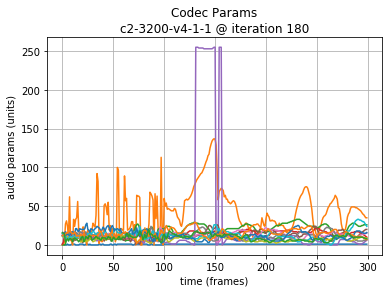

1


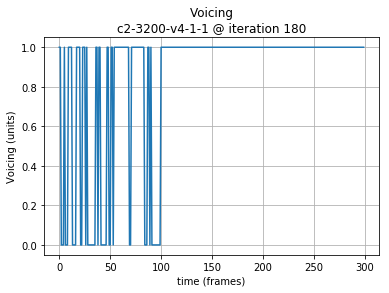

103


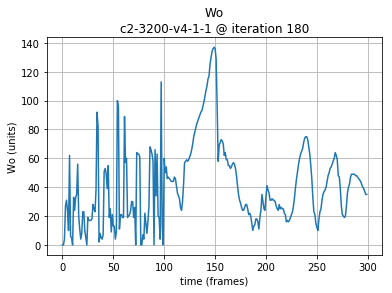

26


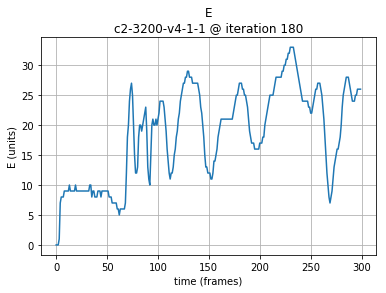

[ 15 253  16  13  21   9   9   7  11  14]


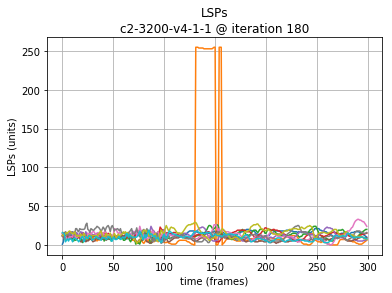

<function print>

In [13]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')
print

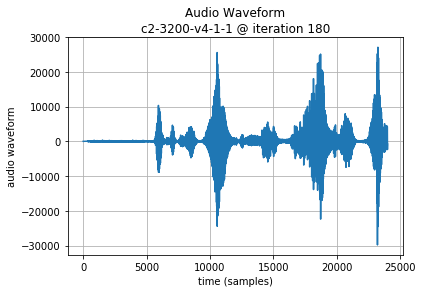

In [14]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [15]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

In [16]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/c2-3200-v4-1-1/out-c2cb-1200'

In [ ]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+".wav"))